# Example 11.4: Modified Refrigeration

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

"# Problem Statement"
R134a is used in a modified refrigeration cycle as shown to cool at two temperatures using a single compressor.  The low $T$ evaporator operates at $-18^\circ\mathrm{C}$ and has a capacity of $3\ \mathrm{tons}$.  The higher $T$ evaporator operates at $3.2\ \mathrm{bar}$ and has a capacity of $2\ \mathrm{tons}$.  The condenser operates at $10\ \mathrm{bar}$. Determine the:
* (a) Mass flow rate through the system
* (b) Compressor power input
* (c) Heat rejection from the consdenser

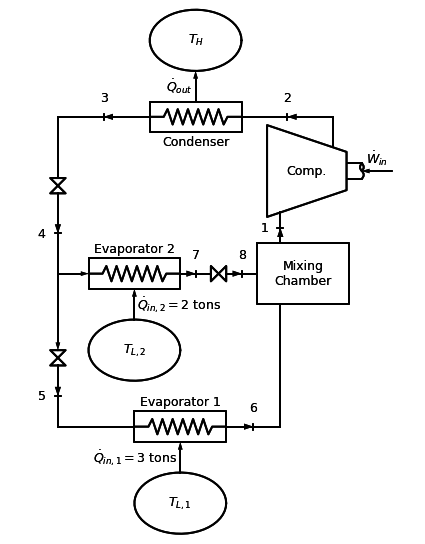

In [3]:
from IPython.display import Image
# import schematics # <- uncomment to regenerate schematic

# schematics.refrigeration_multizone(
#     labels={
#         'q_in_1': '$\dot{Q}_{in,1}=3\ \mathrm{tons}$', #
#         'q_in_2': '$\dot{Q}_{in,2}=2\ \mathrm{tons}$'
#     },
#     file='Figures/refrigeration_multizone.png',
# ) # <- uncomment to regenerate schematic

Image('Figures/refrigeration_multizone.png')

# Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2005379&node=7667540&a=39710957&autoplay=1)__

## Python Initialization

We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [4]:
from kilojoule.templates.default import *
   
r134a = realfluid.Properties('R134a')

### Given Parameters
We now define variables to hold our known values.

In [5]:
T[5] = T[6] = Quantity(-18, 'degC')  # Low T evaprator temperature
p[4] = p[7] = Quantity(3.2, 'bar')  # High T evaporator pressure
p[2] = p[3] = Quantity(10, 'bar')  # Condenser pressure
Qdot_in_1 = Quantity(3, 'refrigeration_ton').to(
    'kW')  # Heat input to low T evaporator
Qdot_in_2 = Quantity(2, 'refrigeration_ton').to(
    'kW')  # Heat input to high T evaporator

Summary(show=True)

<IPython.core.display.Latex object>

,$T$ [K],$p$ [kPa]
2,-,1000.0
3,-,1000.0
4,-,320.0
5,255.15,-
6,255.15,-
7,-,320.0


In [6]:
T.set_units('degF')
Summary(show=True);

<IPython.core.display.Latex object>

,$T$ [°F],$p$ [kPa]
2,-,1000.0
3,-,1000.0
4,-,320.0
5,-0.4,-
6,-0.4,-
7,-,320.0


### Assumptions
- Ideal work devices
- Saturated liquid at condenser exit
- Saturated liquid at Evaporator exit
- Isobaric heat exchangers
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [7]:
x[7] = x[6] = 1
x[3] = 0
p[6] = r134a.p(T[6], x[6])
p[5] = p[8] = p[1] = p[6]

Summary()

<IPython.core.display.Latex object>

,$T$ [°F],$p$ [kPa],$x$ []
1,-,144.600367,-
2,-,1000.000000,-
3,-,1000.000000,0.0
4,-,320.000000,-
5,-0.4,144.600367,-
6,-0.4,144.600367,1.0
7,-,320.000000,1.0
8,-,144.600367,-


### (a) Mass Flow Rates

In [8]:
%%showcalc
"### First Law Analysis"
"#### Isenthalpic from 3 to 4 to 5"
h[3] = r134a.h(p[3], x[3])
h[4] = h[5] = h[3]
"#### Saturated vapor at 6 and 7"
h[6] = r134a.h(p[6], x[6])
h[7] = r134a.h(p[7], x[7])
"#### Mass flow rates from 1st Law"
q_in_2 = h[7] - h[4]
mdot[7] = mdot[8] = Qdot_in_2 / q_in_2
q_in_1 = h[6] - h[5]
mdot[6] = mdot[5] = Qdot_in_1 / q_in_1
mdot[1] = mdot[2] = mdot[3] = mdot[4] = mdot[8] + mdot[6]

### First Law Analysis
#### Isenthalpic from 3 to 4 to 5
\begin{align}
  {h}_{ {{3}} } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ {{3}} }, {x}_{ {{3}} } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 1000.0\ \mathrm{kPa}, 0 \right) = 255.5\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ {{4}} } &= {h}_{ {{5}} } =  {h}_{ {{3}} }  = 255.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

#### Saturated vapor at 6 and 7
\begin{align}
  {h}_{ {{6}} } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ {{6}} }, {x}_{ {{6}} } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 144.6\ \mathrm{kPa}, 1 \right) = 387.79\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ {{7}} } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ {{7}} }, {x}_{ {{7}} } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 320.0\ \mathrm{kPa}, 1 \right) = 400.04\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### Mass flow rates from 1st Law
\begin{align}
  q_{in,2} &=   {h}_{ {{7}} } - {h}_{ {{4}} }  \\
    &=  400.04\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 255.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 144.55\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {\dot{m}}_{ {{7}} } &= {\dot{m}}_{ {{8}} } =  \frac{ \dot{Q}_{in,2} }{ q_{in,2} } \\
    &= \frac{ 7.0337\ \mathrm{kW} }{ 144.55\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.048661\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}

\begin{align}
  q_{in,1} &=   {h}_{ {{6}} } - {h}_{ {{5}} }  \\
    &=  387.79\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 255.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 132.29\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {\dot{m}}_{ {{6}} } &= {\dot{m}}_{ {{5}} } =  \frac{ \dot{Q}_{in,1} }{ q_{in,1} } \\
    &= \frac{ 10.551\ \mathrm{kW} }{ 132.29\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.079752\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}

\begin{align}
  {\dot{m}}_{ {{1}} } &= {\dot{m}}_{ {{2}} } = {\dot{m}}_{ {{3}} } = {\dot{m}}_{ {{4}} } =  {\dot{m}}_{ {{8}} } + {\dot{m}}_{ {{6}} } \\
    &= 0.048661\ \frac{\mathrm{kg}}{\mathrm{s}} + 0.079752\ \frac{\mathrm{kg}}{\mathrm{s}}\\
    &= 0.12841\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}



### (b) Compressor power input

In [9]:
%%showcalc
"### 1st Law to fix state 1"
h[8] = h[7]
h[1] = (mdot[8] * h[8] + mdot[6] * h[6]) / mdot[1]
s[1] = r134a.s(p[1], h=h[1])
"### 1-2) Ideal Compression"
s[2] = s[1]
h[2] = r134a.h(p[2], s[2])
w_in = h[2] - h[1]
Wdot_in = mdot[1] * w_in

### 1st Law to fix state 1
\begin{align}
  {h}_{ {{8}} } &=  {h}_{ {{7}} }  = 400.04\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

\begin{align}
  {h}_{ {{1}} } &=  \frac{  {\dot{m}}_{ {{8}} }  \cdot  {h}_{ {{8}} }  +  {\dot{m}}_{ {{6}} }  \cdot  {h}_{ {{6}} }  }{ {\dot{m}}_{ {{1}} } } \\
    &= \frac{  0.048661\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  400.04\ \frac{\mathrm{kJ}}{\mathrm{kg}}  +  0.079752\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  387.79\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{ 0.12841\ \frac{\mathrm{kg}}{\mathrm{s}} }\\
    &= 392.43\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ {{1}} } &=  \mathrm{ \underset{ r134a }{ s } }\left( {p}_{ {{1}} }, \mathrm{ h } = {h}_{ {{1}} } \right)  = \mathrm{ \underset{ r134a }{ s } }\left( 144.6\ \mathrm{kPa}, \mathrm{ h } = 392.43\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 1.7576\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

### 1-2) Ideal Compression
\begin{align}
  {s}_{ {{2}} } &=  {s}_{ {{1}} }  = 1.7576\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {h}_{ {{2}} } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ {{2}} }, {s}_{ {{2}} } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 1000.0\ \mathrm{kPa}, 1.7576\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 433.94\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  w_{in} &=   {h}_{ {{2}} } - {h}_{ {{1}} }  \\
    &=  433.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 392.43\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 41.507\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{W}_{in} &=   {\dot{m}}_{ {{1}} }  \cdot  w_{in}  \\
    &=  0.12841\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  41.507\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 5.33\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}



### (c) Heat rejection from the condenser

In [10]:
%%showcalc
q_out = h[2] - h[3]
Qdot_out = mdot[2] * q_out

\begin{align}
  q_{out} &=   {h}_{ {{2}} } - {h}_{ {{3}} }  \\
    &=  433.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 255.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 178.44\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{Q}_{out} &=   {\dot{m}}_{ {{2}} }  \cdot  q_{out}  \\
    &=  0.12841\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  178.44\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 22.914\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}



### Summary

In [11]:
Summary(show=True);

<IPython.core.display.Latex object>

,$T$ [°F],$p$ [kPa],$h$ [kJ/kg],$s$ [kJ/K/kg],$x$ [],$\dot{m}$ [kg/s]
1,-,144.600367,392.431395,1.757571,-,0.128413
2,-,1000.000000,433.938256,1.757571,-,0.128413
3,-,1000.000000,255.495856,-,0.0,0.128413
4,-,320.000000,255.495856,-,-,0.128413
5,-0.4,144.600367,255.495856,-,-,0.079752
6,-0.4,144.600367,387.787860,-,1.0,0.079752
7,-,320.000000,400.041884,-,1.0,0.048661
8,-,144.600367,400.041884,-,-,0.048661


### Diagrams

In [12]:
# Remaining properties
for i in range(1, 9):
    states.fix(i, r134a)

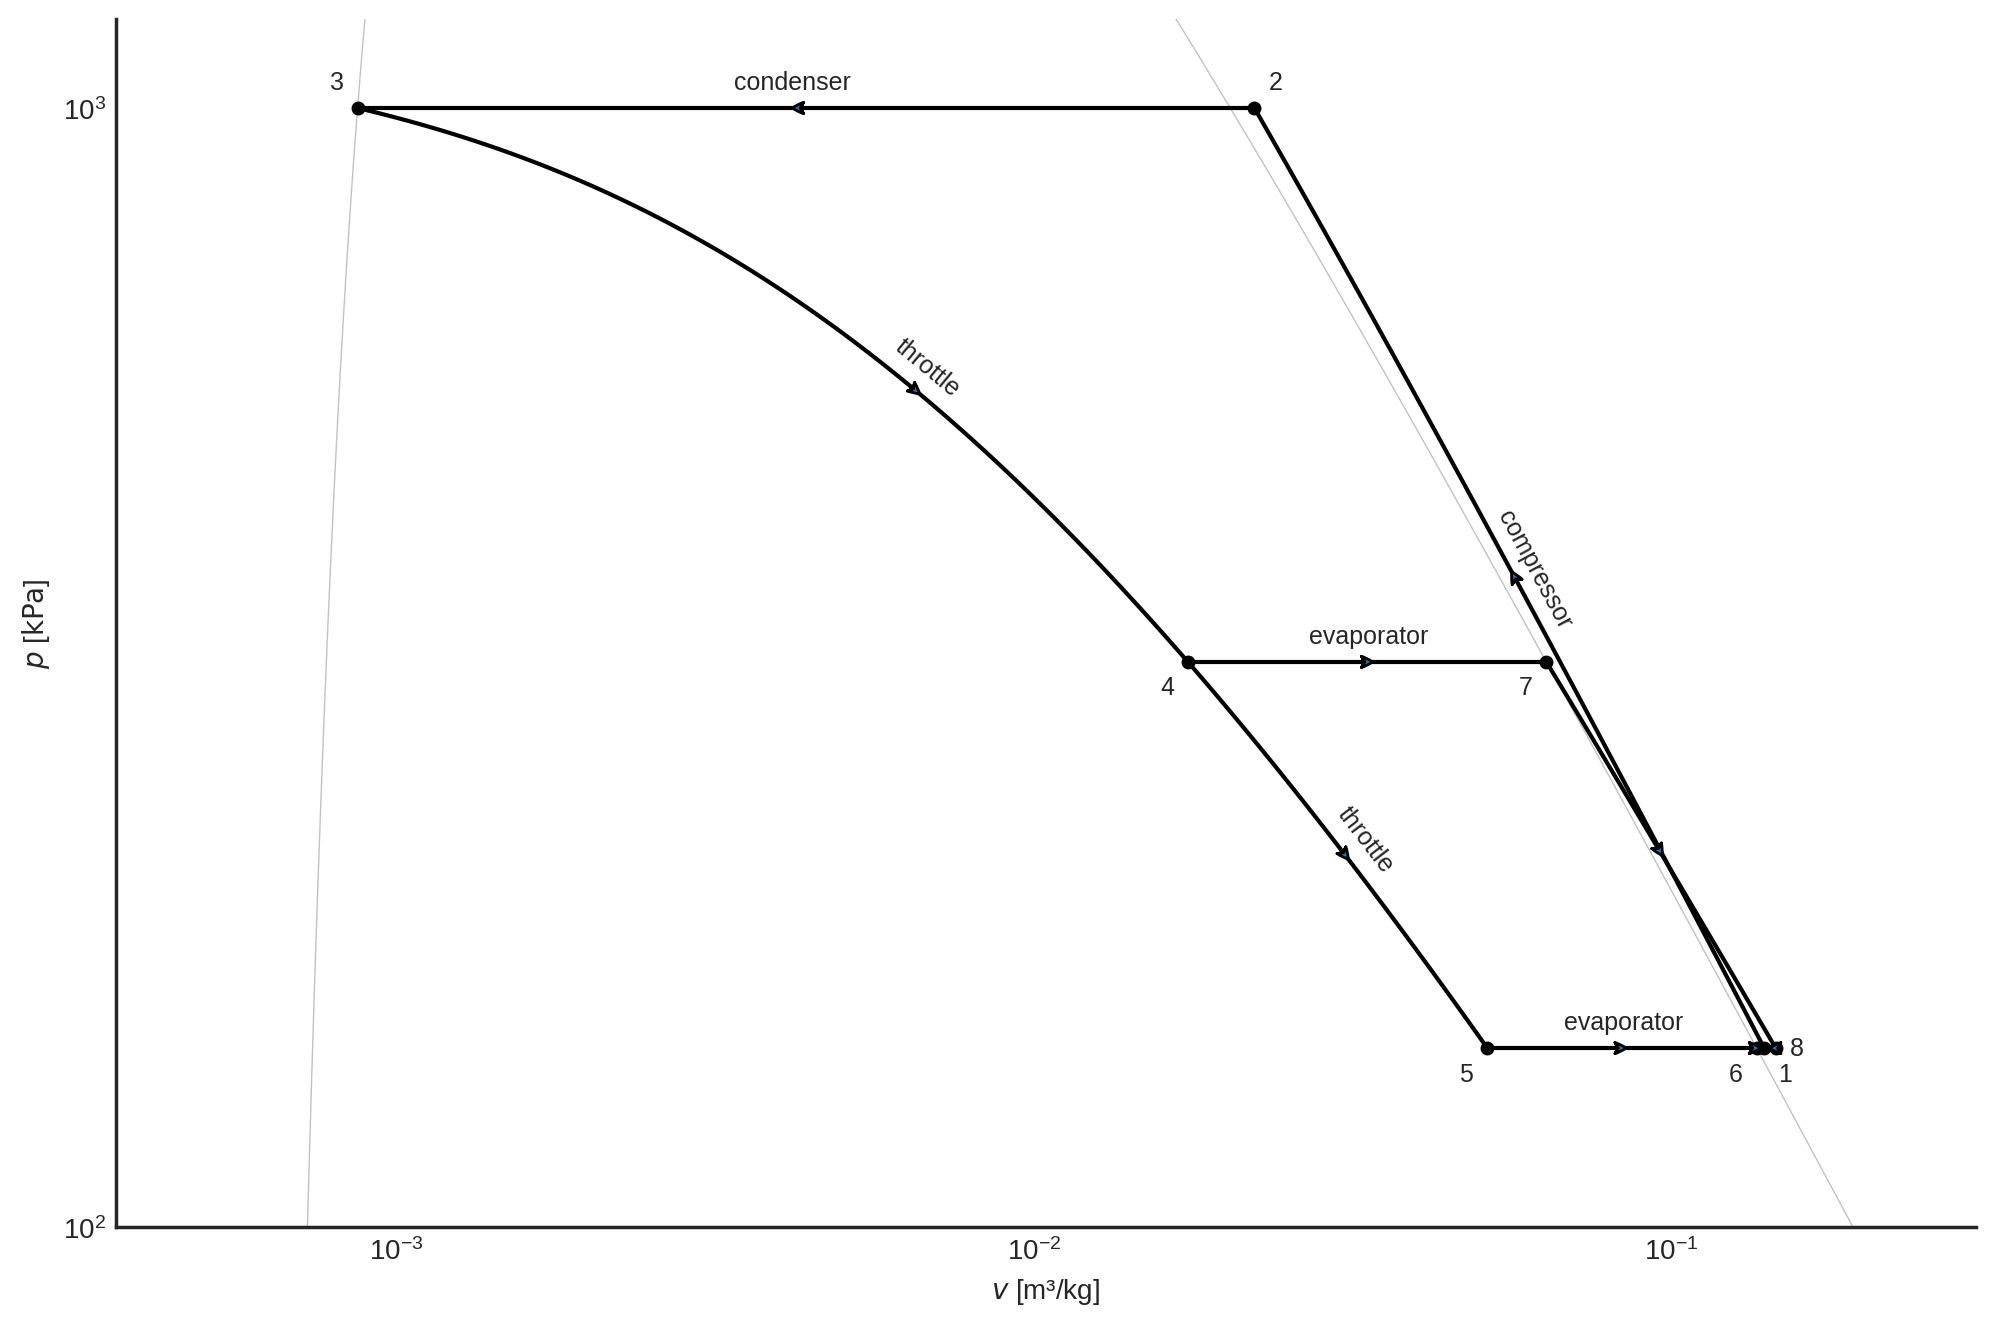

In [13]:
pv = r134a.pv_diagram()
pv.ax.set_ylim(bottom=100, top=1200)
pv.ax.set_xlim(right=.3)

pv.plot_state(states[1], label_loc='south east')
pv.plot_state(states[2], label_loc='north east')
pv.plot_state(states[3], label_loc='north west')
pv.plot_state(states[4], label_loc='south west')
pv.plot_state(states[5], label_loc='south west')
pv.plot_state(states[6], label_loc='south west')
pv.plot_state(states[7], label_loc='south west')
pv.plot_state(states[8], label_loc='east')

pv.plot_process(states[1], states[2], path='isentropic', label='compressor')
pv.plot_process(states[2], states[3], path='isobaric', label='condenser')
pv.plot_process(states[3], states[4], path='isenthalpic', label='throttle')
pv.plot_process(states[4], states[7], path='isobaric', label='evaporator')
pv.plot_process(states[4], states[5], path='isenthalpic', label='throttle')
pv.plot_process(states[5], states[6], path='isobaric', label='evaporator')
pv.plot_process(states[6], states[1], path='isobaric')
pv.plot_process(states[7], states[8], path='isenthalpic')
pv.plot_process(states[8], states[1], path='isobaric');

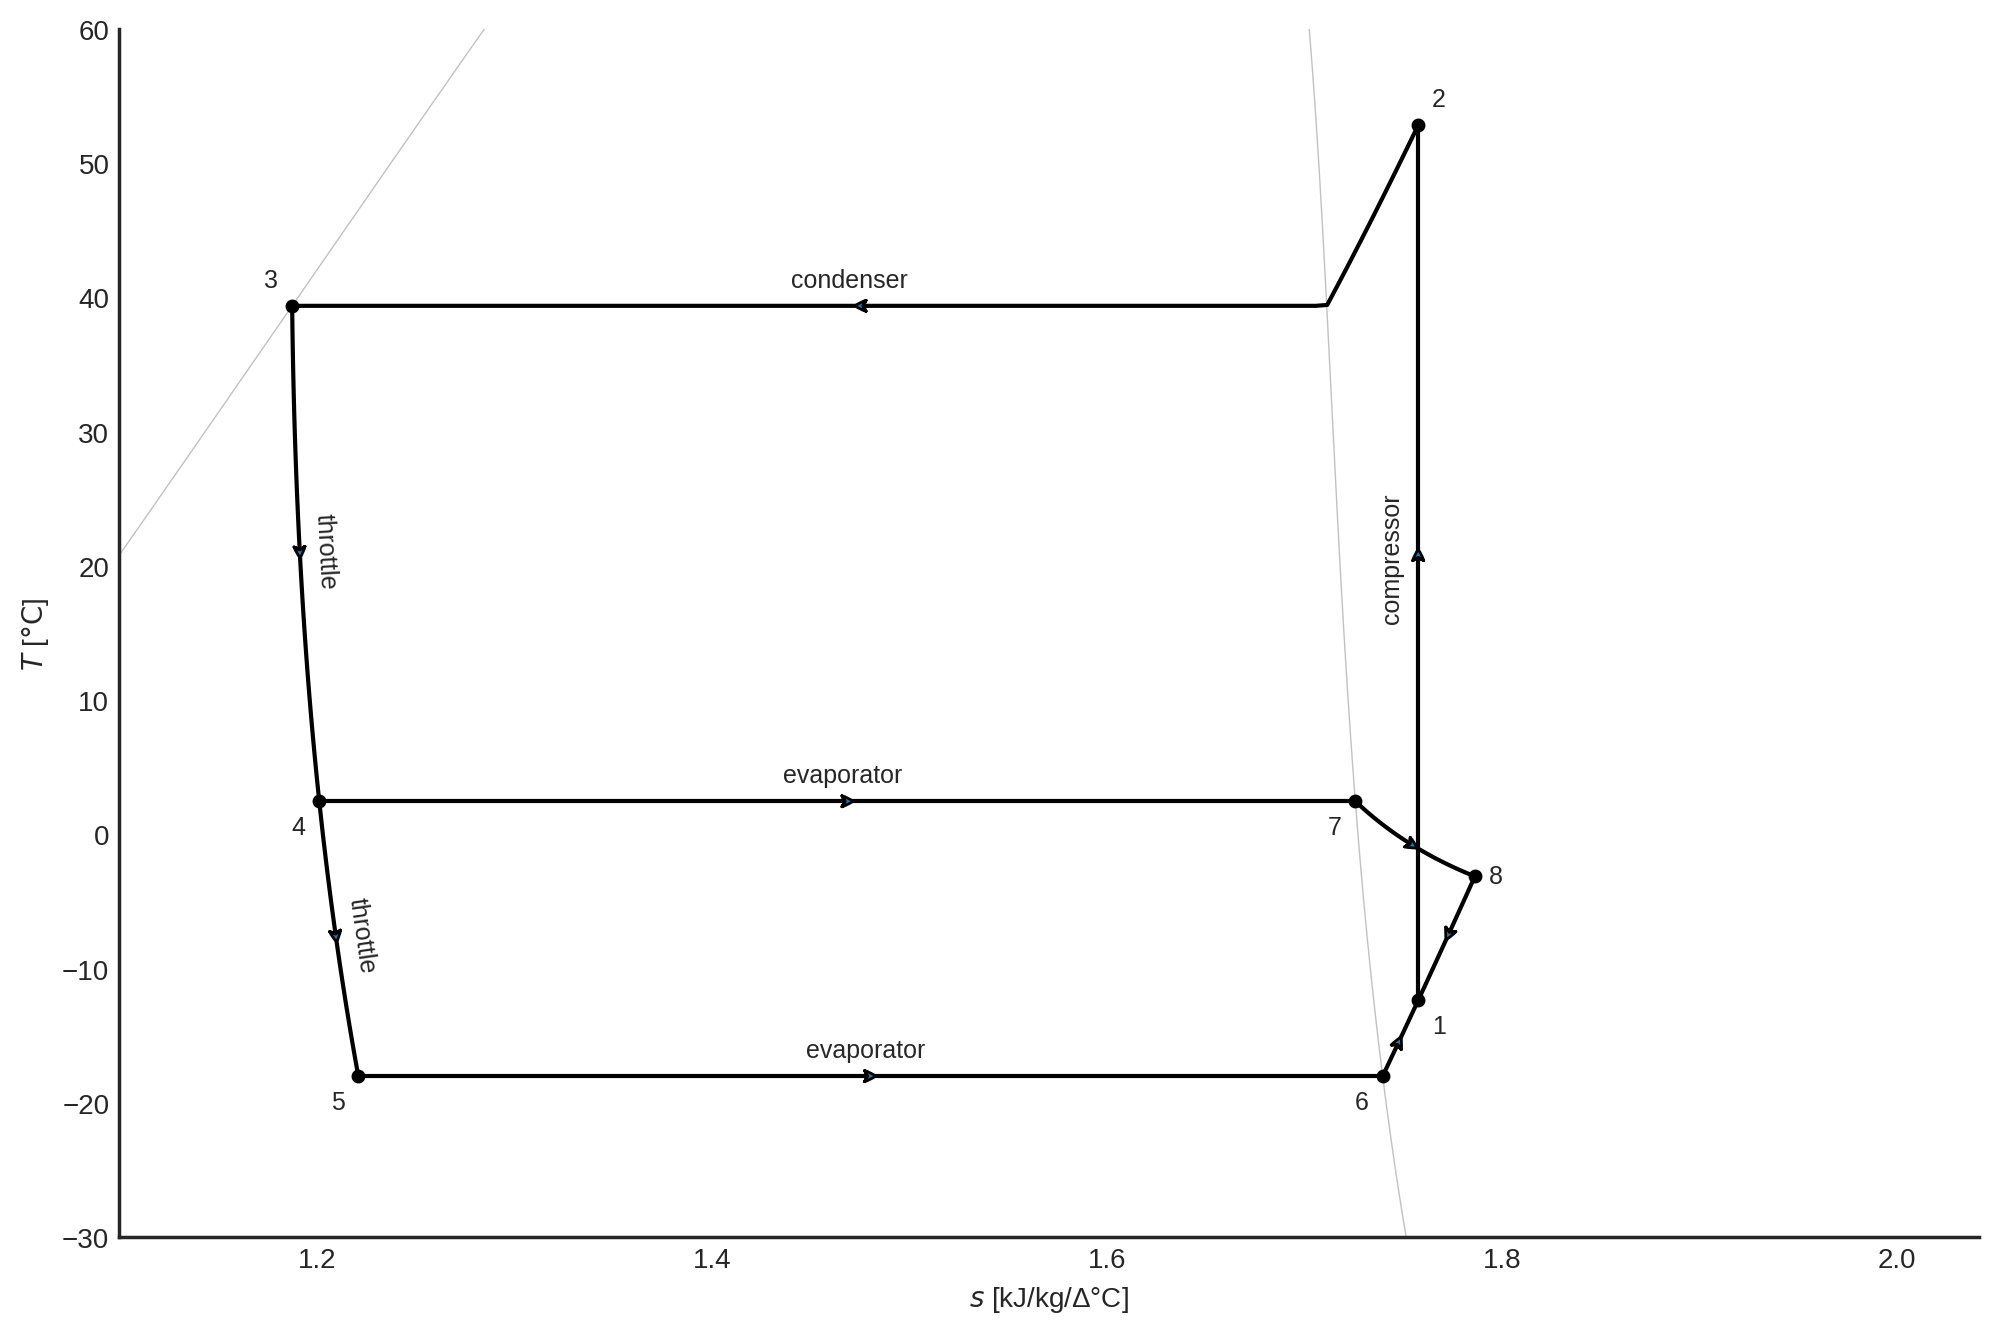

In [14]:
Ts = r134a.Ts_diagram()
Ts.ax.set_ylim(bottom=-30, top=60)
Ts.ax.set_xlim(left=1.1)

Ts.plot_state(states[1], label_loc='south east')
Ts.plot_state(states[2], label_loc='north east')
Ts.plot_state(states[3], label_loc='north west')
Ts.plot_state(states[4], label_loc='south west')
Ts.plot_state(states[5], label_loc='south west')
Ts.plot_state(states[6], label_loc='south west')
Ts.plot_state(states[7], label_loc='south west')
Ts.plot_state(states[8], label_loc='east')

Ts.plot_process(states[1], states[2], path='isentropic', label='compressor')
Ts.plot_process(states[2], states[3], path='isobaric', label='condenser')
Ts.plot_process(states[3], states[4], path='isenthalpic', label='throttle')
Ts.plot_process(states[4], states[7], path='isobaric', label='evaporator')
Ts.plot_process(states[4], states[5], path='isenthalpic', label='throttle')
Ts.plot_process(states[5], states[6], path='isobaric', label='evaporator')
Ts.plot_process(states[6], states[1], path='isobaric')
Ts.plot_process(states[7], states[8], path='isenthalpic')
Ts.plot_process(states[8], states[1], path='isobaric');

In [15]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html --no-input --no-prompt "Ex11.4 Modified Refrigeration.ipynb"